<a href="https://colab.research.google.com/github/ZahraAslamKhan/AI-Calories-Burnt-Predictor-/blob/main/CaloriesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CALORIES BURNT PREDICTING MODEL**




**Importing libraries.**

In [ ]:
 import numpy as np
 import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Importing dataset files.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
exercise= pd.read_csv('/content/drive/MyDrive/exercise.csv')

In [ ]:
calories= pd.read_csv('/content/drive/MyDrive/calories.csv')

**Viewing Dataset**

In [ ]:
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [ ]:
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


**Concatenating Dataset**

In [16]:
dataset = pd.concat([exercise,calories.Calories],axis=1)
dataset

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


**Data Visualisation.**

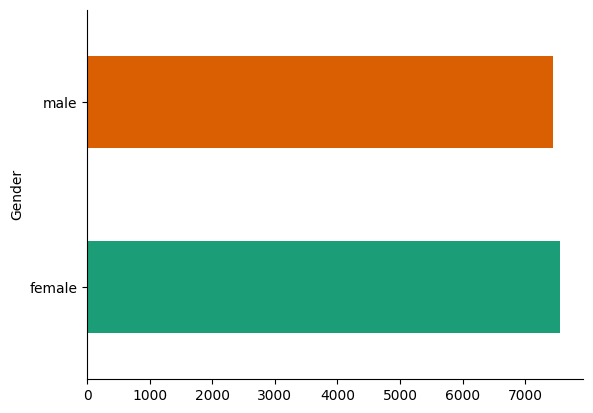

In [18]:
# @title Gender Distribution

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

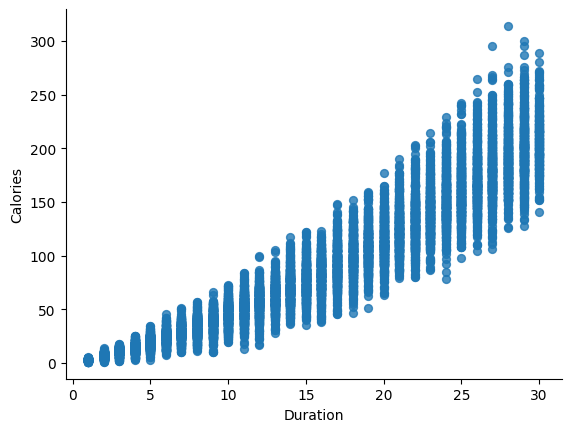

In [31]:
# @title Duration VS Calories

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='Duration', y='Calories', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

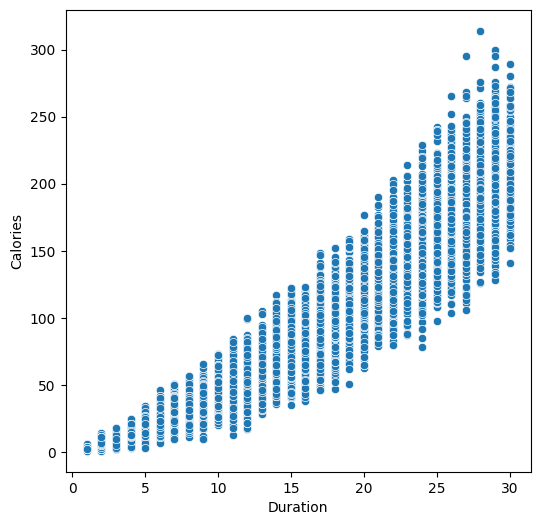

In [36]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=dataset.Duration,y=dataset.Calories)
plt.show()

**Data Cleaning & Pre-processing**

In [37]:
# @title Checking for missing values
dataset.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [39]:
dataset.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [42]:
# @title Checking for duplicate rows
duplicates = dataset.duplicated()

# Display the duplicate rows
print("Duplicate Rows:")
print(dataset[duplicates])

Duplicate Rows:
Empty DataFrame
Columns: [User_ID, Gender, Age, Height, Weight, Duration, Heart_Rate, Body_Temp, Calories]
Index: []


**TRAINING DATASET**

In [47]:
# @title Training on Duration only
X = dataset.drop(['User_ID','Gender','Age','Height','Weight','Heart_Rate','Body_Temp','Calories'],axis=1,index=None)
y = dataset.drop(['User_ID','Gender','Age','Height','Weight','Heart_Rate','Body_Temp','Duration'],axis=1)

In [48]:
# @title DATA SPLITTING
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (12000, 1)
Shape of X_test: (3000, 1)


**LINEAR REGRESSION**

In [50]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [51]:
# @title Calculating R-squared score of Training data
predictions = lr.predict(X_train)
score = metrics.r2_score(y_train,predictions)
score

0.9123562018290068

In [52]:
# @title Calculating R-squared score of Testing data
predictions1 = lr.predict(X_test)
score1 = metrics.r2_score(y_test,predictions1)
score1

0.914504752724938

**Decision Tree Modeing**

In [58]:
# Creating a DecisionTreeRegressor object
dt = DecisionTreeRegressor()

# Fitting the model to the training data
dt.fit(X_train, y_train)

# Making predictions on the training data
predictions2 = dt.predict(X_train)

# Calculating the R-squared score on the training data
score2 = metrics.r2_score(y_train, predictions2)

print("R-squared score on training data:", score2)

R-squared score on training data: 0.9282248617533129


In [59]:
# @title R-Squares Score for Decision Tree
predictions2_1 = dt.predict(X_test)
score2_1 = metrics.r2_score(y_test,predictions2_1)
print("R-squared score on testing data:", score2_1)

R-squared score on testing data: 0.931790696825987


**Training using Random Forest Regressor**

In [63]:
# Create a DecisionTreeRegressor object
dt = DecisionTreeRegressor()

# Flatten or reshape y_train to a 1D array
y_train_flat = y_train.values.ravel()

# Fit the model to the training data
dt.fit(X_train, y_train_flat)

DecisionTreeRegressor()

**R-squared Score for Random Forest Regressor**

In [64]:
predictions3 = dt.predict(X_train)

# Calculate the R-squared score on the training data
score3 = metrics.r2_score(y_train_flat, predictions3)

print("R-squared score on training data:", score3)

R-squared score on training data: 0.9282248617533129


In [66]:
predictions3_1= rf.predict(X_test)
score3_1 = metrics.r2_score(y_test,predictions3_1)
print("R-squared score on testing data:", score3_1)

R-squared score on testing data: 0.9318224394230065
